# SVM On Iris dataset

### Importing libraries

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model selection


In [13]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Prediction on X_test

In [ ]:
y_pred = model.predict(X_test)
print("Predictions on test set:", y_pred)

Predictions on test set: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### Accuracy, confusion_matrix, classification_report

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy on test set: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Graphical representation

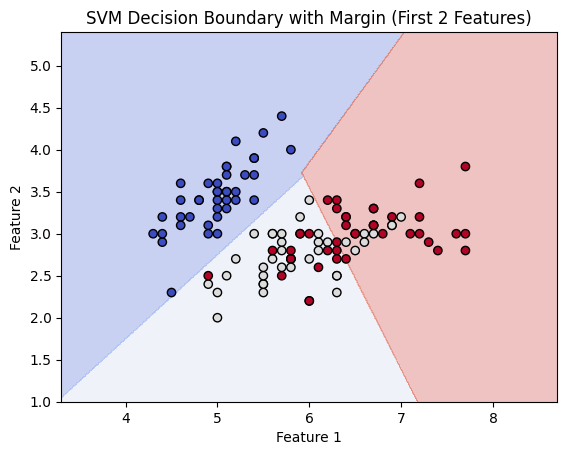

In [27]:
import numpy as np

# Use only the first two features for 2D visualization
X_vis = X_train[:, :2]
y_vis = y_train

# Train new model on 2D data
model_vis = SVC(kernel='linear', random_state=42)
model_vis.fit(X_vis, y_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over the grid
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Margin (First 2 Features)')
plt.show()


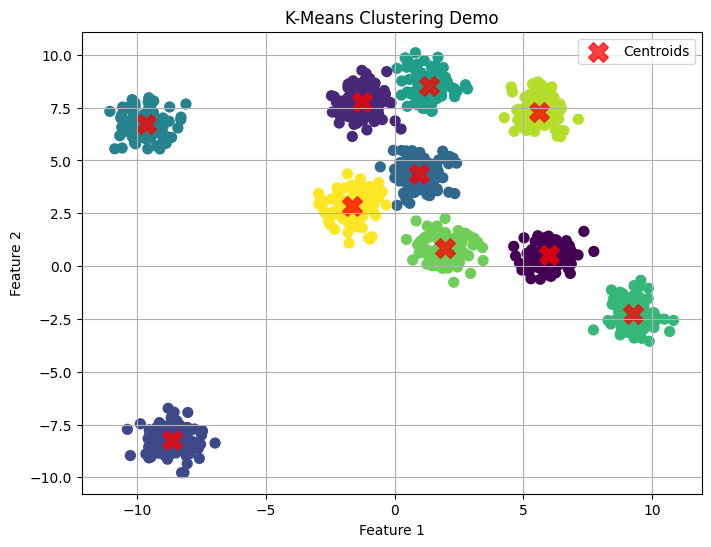

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create synthetic data with 3 clusters
X, _ = make_blobs(n_samples=1000, centers=10, cluster_std=0.60, random_state=0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("K-Means Clustering Demo")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
def dfs_with_stack(graph, start, goal):
    visited = set()
    stack = [(start, [start])]  # (current_node, path)

    while stack:
        node, path = stack.pop()
        if node == goal:
            return path
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                stack.append((neighbor, path + [neighbor]))
        
    return None  # No path found

# Example graph represented as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Example usage
start_node = 'A'
goal_node = 'F'
path = dfs_with_stack(graph, start_node, goal_node)
print(f"Path from {start_node} to {goal_node}: {path if path else 'No path found'}")

Path from A to F: ['A', 'C', 'F']


In [6]:
# Greedy Best-First Search
from queue import PriorityQueue

def greedy_best_first_search(graph, start, goal, heuristic):
    visited = set()
    pq = PriorityQueue()
    pq.put((heuristic[start], start, [start]))  # (priority, curren # (priority, current_node, path)

    while pq:
        _, node, path = pq.get()  # Get the node with the lowest heuristic value
        
        if node == goal:
            return path
        
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    pq.put((heuristic[neighbor], neighbor, path + [neighbor]))
    
    return None  # No path found

heuristic = {
    'A': 5,
    'B': 4,
    'C': 2,
    'D': 3,
    'E': 1,
    'F': 0
}

# Example usage of Greedy Best-First Search
start_node = 'A'
goal_node = 'F'
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

path = greedy_best_first_search(graph, start_node, goal_node, heuristic)
print(f"Path from {start_node} to {goal_node} using Greedy Best-First Search: {path if path else 'No path found'}")

Path from A to F using Greedy Best-First Search: ['A', 'C', 'F']


In [20]:
# A* Search Algorithm
def a_star_search(graph, start, goal, heuristic):
    pq = PriorityQueue()
    pq.put((0 + heuristic[start], start, 0, [start]))
    visited = set()
    while not pq.empty():
        _, node, cost, path = pq.get()
        if node == goal:
            return path
        
        if node not in visited:
            visited.add(node)
            for neighbor, edge_cost in graph[node]:
                new_cost = cost + edge_cost
                pq.put((new_cost + heuristic[neighbor], neighbor, new_cost, path + [neighbor]))
    
    return None

start_node = 'S'
goal_node = 'E'

graph = {
    'S' : [('A', 0)],
    'A' : [('B', 1), ('C', 4)],
    'B' : [('A', 1), ('D', 2), ('E', 5)],
    'C' : [('A', 4), ('F', 1)],
    'D' : [('B', 2)],
    'E' : [('B', 5), ('F', 3)],
    'F' : [('C', 1), ('E', 3)]
}

heuristic = {
    'S': 0, 
    'A': 5,
    'B': 4,
    'C': 2,
    'D': 3,
    'E': 1,
    'F': 0
}
path = a_star_search(graph, start_node, goal_node, heuristic)
print(f"Path from {start_node} to {goal_node} using A* Search: {path if path else 'No path found'}")

Path from S to E using A* Search: ['S', 'A', 'B', 'E']
